IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*


# TD-TME 5 : Réduction de dimensionnalité: visualisation & débruitage. Algorithme ADALINE et descente de gradient.

<font size="+1" color="RED"><b>[Q]</b></font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

KABONGO BUZANGU Ben

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-05</tt> et rajouter à la suite de <tt>tme-05</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-05-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

In [1]:
# Importation de librairies standards:
import time
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline  

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

In [2]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut


# Bilan des séances précédentes

<div class="alert alert-block alert-warning">
Avant de vous attaquer à la partie suivante sur la visualisation des données, vous devez avoir terminé les TME précédents, et en particulier:

1. les fonctions pour générer des datasets uniformes, gaussiens et XOR.
2. les classifieurs: ClassifierKNN, ClassifierLineaireRandom, ClassifierPerceptron, ClassifierPerceptronBiais, ClassifierPerceptronKernel
3. le classifieur multiclasses ClassifierMultiOOA    
4. les fonctions crossval, crossval_strat et analyse_perfs
5. toutes les fonctions et classes doivent avoir été testées et validées, et recopiées dans les fichiers correspondants:
    - utils.py pour les fonctions 1) 
    - Classifiers.py pour les fonctions 2) et 3) 
    - evaluations.py pour les fonctions 4)

Si vous ne les avez pas terminées : consacrer le début de ce TME 5 à vous mettre à jour.    
</div>    

# Visualisation de données

Nous proposons une série d'expériences pour appréhender la visualisation de données et la réduction de la dimensionnalité:

1. Comprendre la signification des valeurs propres et vecteurs propres sur les données gaussiennes sur lesquelles nous avons travaillé jusqu'ici
1. Générer un jeu de données jouet en 3D puis réduire la dimensionnalité
1. Appliquer cette réduction de dimension sur les données USPS

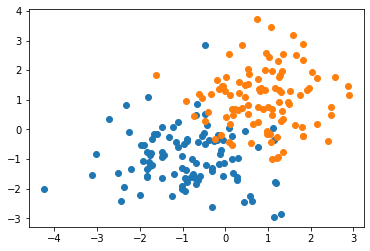

In [3]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 100
X,Y =  ut.genere_dataset_gaussian([-1,-1],[[1,0],[0,1]], [1, 1],[[1,0],[0,1]],N)

plt.figure()
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==-1,0],X[Y==-1,1])

<font color="RED" size="+1"><b>[Q]</b></font> Avant de poursuivre, répondez aux questions suivantes:
- Combien y a-t-il de vecteurs propres et de valeurs propres dans ce problème?
- Quel axe de plus forte variance est pressenti?

`Etant en 2 dimensions, on a 2 vecteurs propres et 2 valeurs propres.`

`On cherche à maximiser la variance. Le premier vecteur propre est l'axe sur lequel la variance des points projetées est grande.`
`Le second est un vecteur orthogonal au premier qui maximise la variance sur son axe.`

Vérifions maintenant avec du code.
L'idée est d'appliquer la fonction de la librairie Numpy: ```linalg.eig``` sur la matrice de correlation $X^T X$ et d'afficher les sorties pour les comprendre.

In [4]:
# Avant cela : 
# petit rappel sur les matrices:
M = np.array([[1,2,3],[4,5,6], [1, 0, 0]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [1, 0, 0]])

In [5]:
# Transposée de M:
M.T

array([[1, 4, 1],
       [2, 5, 0],
       [3, 6, 0]])

In [6]:
# Produit de matrices:
M.T @ M

array([[18, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

<font color="RED" size="+1"><b>[Q]</b></font> Refaire les calculs précédents à la main, sur une feuille !

In [7]:
# Donner les instructions pour récupérer les valeurs propres et vecteurs propres de la 
# matrice X générée précédeemment, puis les afficher:

lam, V = np.linalg.eig(X.T @ X)

print("1er valeur rendue:\n", lam)
print("2e valeur rendue :\n", V)

1er valeur rendue:
 [187.39293175 530.10654865]
2e valeur rendue :
 [[-0.75682772 -0.65361441]
 [ 0.65361441 -0.75682772]]


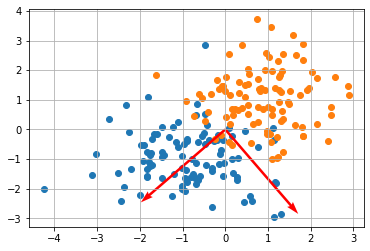

In [8]:
# tracer les vecteurs propres, à partir de (0,0) sur le scatter des points (X,Y)
# A l'aide de la commande plt.text, vous pouvez rajouter la "force" des axes si vous voulez

plt.figure()
plt.grid('on')
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==-1,0],X[Y==-1,1])
plt.quiver(*np.zeros((2, 2)), V[:,0], V[:,1], scale=3, color='red')

# Si vous voulez sauvegarder l'image : 
#plt.savefig("out/acp.png",bbox_inches='tight', transparent=True,pad_inches=0)



On voit bien la principale direction de variance (associée à la plus grande valeur propre)

## Réduction de données 2D => 1D

Dans une logique de réduction de dimensionnalité, on souhaite:
1. extraire automatiquement le vecteur propre associé à la plus grande valeur propre
1. projeter les données sur cet axe
1. afficher le plot 1D des données suivant:
    - x = nouvelle coordonée (unique) du point
    - y = étiquette

Cet affichage va nous permettre de comprendre ce que nous venons de faire.

<font color="RED" size="+1"><b>[Q]</b></font> Donner les instructions qui réalisent les 3 étapes données ci-dessus.


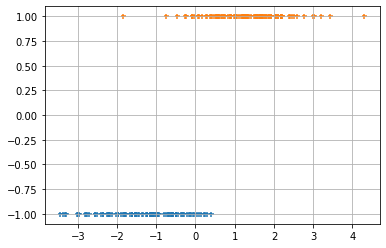

In [9]:
import math

plt.figure()
X_proj = np.dot(X, V.T[1])
plt.scatter(X_proj[Y==-1], Y[Y==-1], marker='+', s=25)
plt.scatter(X_proj[Y==+1], Y[Y==+1], marker='+', s=25)
plt.grid()


Pour mieux comprendre ce qui se passe, je vous propose la figure explicative suivante qui illustre ce que vous avez fait du point de vue géométrique:
<img src="ressources/proj_2D.png" width=300px>


(si l'image ne s'affiche pas, aller la voir dans le répertoire `ressources/`, c'est l'image `proj_2D.png`.

**Note:** cette dernière figure est non-triviale à obtenir, il ne faut pas perdre du temps en TP à chercher comment faire :)

## Réduction de données d-D => 2D

Passons maintenant sur les données USPS pour essayer de reproduire les figures du cours 5.

In [10]:
# Important de pickle pour récupérer les données
import pickle as pkl

# Chargement des données USPS :

# **** IMPORTANT ****
# faire un lien vers le fichier usps.pkl qui a été fournie dans les TME précédents (répertoire ressources)
# dans un sous-répertoire ressources du répertoire où se trouve ce notebook.
# Ou bien : modifier dans open() pour mettre le bon chemin d'accès vers usps.pkl sur votre compte.

data = pkl.load(open('ressources/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)
XTu = np.array(data['X_test'], dtype=float) # conversion de type pour une meilleure compatibilité
YTu = np.array(data['Y_test'], dtype=float)


<font color="RED" size="+1"><b>[Q]</b></font> Donner les instructions qui réalisent les 3 étapes suivantes:

1. Extraire automatiquement les 2 vecteurs propres associés aux 2 plus grandes valeurs propres sur les données USPS
1. Projeter les données sur ces axes
    - projeter toutes les données
    - projeter seulement les 200 premières images (pour mieux voir)
1. Afficher avec un code couleur correspondant aux classes

Cet affichage va nous permettre de comprendre ce que nous venons de faire.

In [11]:
# A réaliser :

# 1) calcul des vecteurs propres
W, V = np.linalg.eig(Xu.T @ Xu)

# 2) affichage (print)
#print("Valeurs propres :", W)
#print("Vecteurs propres :", V)
print(W.shape)
print(V.shape)

(256,)
(256, 256)


In [12]:
# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
i, j = np.argsort(W)[-2:]
print(W[j], W[i])
print(j, i)
print("Sélection des 2 meilleurs")
print("Valeurs propres :", W[i], W[j])

682117.4353629774 109994.11663161484
0 1
Sélection des 2 meilleurs
Valeurs propres : 109994.11663161484 682117.4353629774


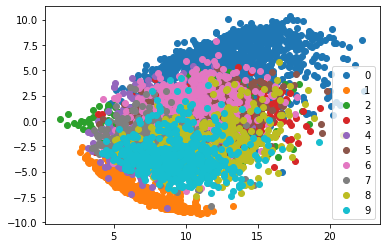

In [13]:

# 4) affichage (plot) avec un code couleur pour les classes

Xu_proj_j = np.dot(Xu, V.T[j])
Xu_proj_i = np.dot(Xu, V.T[i])
for y in range(10):
    plt.scatter(Xu_proj_j[Yu==y], Xu_proj_i[Yu==y])
plt.legend(np.arange(10))

#plt.savefig("out/proj_usps_all.png",bbox_inches='tight', transparent=True,pad_inches=0)


On a l'impression que les 0 et 1 sont bien séparés des autres classes... Le reste est un peu confus mais on voit que:
- les 8 et les 9 se ressemblent
- les 6 et les 3 dans une moindre mesure
- les 7 et les 4 un peu aussi
- les 2 sont en plein milieu

## Interprétation des vecteurs propres

Chacun de nos 2 axes contient beaucoup d'informations... Mais lesquelles?
Ces axes sont en 256 dimensions, il est possible de les tracer comme une image. L'idée est de distinguer les dimensions positives et les dimensions négatives.
On ne va pas reconstruire une échelle de couleur propre... Mais on peut a minima afficher l'échelle.

Le code est fourni ci-dessous.

<table border="0">
 <tr>
    <td><img src="ressources/vp_0.png"></td>
    <td><img src="ressources/vp_1.png"></td>
 </tr>
</table>

Le premier axe est sensible aux pixels allumés en haut et en bas: sur le premier axe de la figure de la boite précédente, on remarque que les chiffres les plus à droite sont le 0 et le 3... Ca colle.

Le second axe est sensible aux pixels à gauche et à droite (en positif) et aux pixels du centre (en négatif). On a bien les 0 en haut et les 1 en bas de ce second axe.

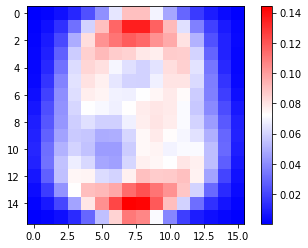

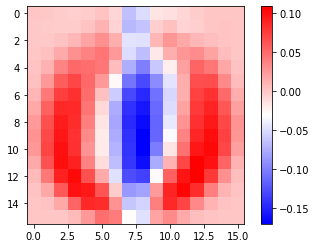

In [14]:
"""
for i in range(vp.shape[1]):
    plt.figure()
    plt.imshow(vp[:,i].reshape(16,16),cmap='bwr')
    plt.colorbar()
    #plt.savefig("out/vp_"+str(i)+".png",bbox_inches='tight', transparent=True,pad_inches=0)
"""
plt.figure()
plt.imshow(V[:,j].reshape(16,16),cmap='bwr')
plt.colorbar()

plt.figure()
plt.imshow(V[:,i].reshape(16,16),cmap='bwr')
plt.colorbar()


## Vers un espace de représentation débruité

Que se passe-t-il si on classe les points dans cet espace?
En 2d, on voit qu'il n'y a pas assez de dimension... Mais on peut:

1. Etudier les valeurs de toutes les valeurs propres (triées) pour voir combien sont importantes
    - soit on trie et on affiche les valeurs
    - soit on trace un histogramme des valeurs
1. Choisir un nombre de vecteurs propres par rapport à l'expérience précédente... On se rend compte que ce n'est pas évident: peu de valeurs propres captent toute l'énergie. En tout état de cause, 20 valeurs propres semblent raisonnables
1. Projeter les données d'apprentissage et de test
1. Etudier le taux de bonne classification dans ce nouvel espace par rapport à l'espace d'origine

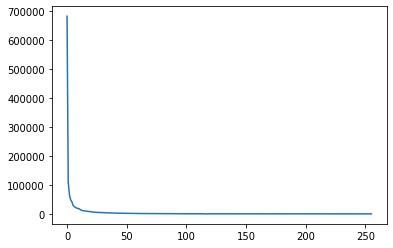

In [15]:
# Etude des valeurs propres - Plot
plt.figure()
plt.plot(W)

(array([251.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.84373869e+00, 3.41095233e+04, 6.82152029e+04, 1.02320882e+05,
        1.36426562e+05, 1.70532242e+05, 2.04637921e+05, 2.38743601e+05,
        2.72849280e+05, 3.06954960e+05, 3.41060640e+05, 3.75166319e+05,
        4.09271999e+05, 4.43377678e+05, 4.77483358e+05, 5.11589037e+05,
        5.45694717e+05, 5.79800397e+05, 6.13906076e+05, 6.48011756e+05,
        6.82117435e+05]),
 <BarContainer object of 20 artists>)

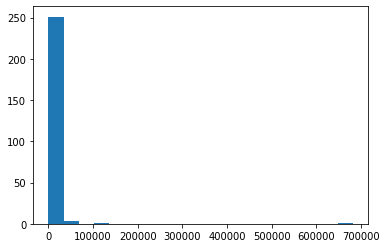

In [16]:
# Etude des valeurs propres - Histogram
plt.figure()
plt.hist(W, 20)

In [22]:
# réduction à 20 dimensions
ndim = 20
Xr = Xu @ V[:,:ndim]
XTr = XTu @ V[:,:ndim]

In [23]:
import time    # pour évaluer les temps d'exécution

# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# Apprentissage d'un perceptron multiclasses

cl_reduit = classif.ClassifierPerceptron(ndim, 1e-3)
clmulti_reduit = classif.ClassifierMultiOAA(cl_reduit)

tic = time.time()  # On lance le chrono
clmulti_reduit.train(Xr, Yu)
toc = time.time()  # On arrête le chrono

perf_A = clmulti_reduit.accuracy(Xr, Yu)
perf_T = clmulti_reduit.accuracy(XTr, YTu)

print(f"Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")


Perfs : 0.8213, 0.8104, en 37.49 secondes


In [24]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# Comparer le résultat précédent avec le suivant:
# Apprentissage d'un perceptron multiclasse dans l'espace d'origine

cl = classif.ClassifierPerceptron(256, 1e-3)
clmulti = classif.ClassifierMultiOAA(cl)

tic = time.time()  # On lance le chrono
clmulti.train(Xu, Yu)
toc = time.time()  # On arrête le chrono

perf_A = clmulti.accuracy(Xu, Yu)
perf_T = clmulti.accuracy(XTu, YTu)

print(f"Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")


Perfs : 0.9709, 0.9182, en 53.14 secondes


# Un nouveau classifieur : ADALINE et la minimisation des moindres carrés

<div class="alert alert-block alert-info">
    
Une fonction de coût très utilisée est la fonction des moindres carrés:
$$ \mathcal C = \sum_{i=1}^N (f(\mathbf x_i) - y_i)^2$$
Il faut que $f(\mathbf x_i)$ soit le plus proche possible de $y_i$ pour faire baisser ce coût.

Dans le cas où $f$ est une fonction linéaire, on peut résoudre le problème de minimisation de la fonction de coût par une descente de gradient stochastique, un peu comme pour le perceptron:

**Algorithme ADALINE:**
1. Initialisation de $\mathbf w$ aléatoire
1. Boucle 
    1. Tirage d'un point $i$
    1. Calcul du gradient $\nabla_{\mathbf w} \mathcal C$ (cf ci-dessous)
    1. $\mathbf w \leftarrow \mathbf w - \epsilon \nabla_{\mathbf w} \mathcal C $
    1. Test de convergence + sortie
    
Avec:
$$\nabla_{\mathbf w} \mathcal C = \mathbf x_i^T (\mathbf x_i \mathbf w - y_i) \in \mathbb R^d $$

</div>

(remarque: $\nabla$ est la notation pour le gradient de la fonction)

<font color="RED" size="+1"><b>[Q]</b></font> Coder l'algorithme ADALINE et vérifier qu'il fonctionne bien sur des données jouet. Pour vous aider, nous vous donnons le squelette de la classe à créer dans la boîte suivante. Veuillez noter l'utilisation de `classif.Classifier` pour définir la classe mère de ce nouveau classifier.



In [26]:
class ClassifierADALINE(classif.Classifier):
    """ Perceptron de ADALINE
    """
    def __init__(self, input_dimension, learning_rate, history=False, niter_max=1000):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples
                - learning_rate : epsilon
                - history : stockage des poids w en cours d'apprentissage
                - niter_max : borne sur les iterations
            Hypothèse : input_dimension > 0
        """
        classif.Classifier.__init__(self, input_dimension)
        self.learning_rate = learning_rate
        self.w = .001 * (2 * np.random.uniform(0, 1, input_dimension) - 1)
        self.history = history
        self.allw = []
        if self.history:
            self.allw.append(self.w.copy())
        self.niter_max = niter_max
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            réalise une itération sur l'ensemble des données prises aléatoirement
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        #perfs = [0]
        for _ in range(self.niter_max):
            #rdm = np.array(range(len(label_set)))
            #np.random.shuffle(rdm)
            #for i in rdm:
            i = np.random.randint(0, len(label_set))
            xi = desc_set[i]
            yi = label_set[i]
            delta = xi.T * ((np.dot(xi, self.w) - yi) ** 2)
            self.w -= self.learning_rate * delta
            if self.history:
                self.allw.append(self.w.copy())
            # test de convergeance
            #perfs.append(self.accuracy(desc_set, label_set))
            #if np.abs(perfs[-1] - perfs[-2]) < 1e-5:
            #    break
        #return perfs
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(self.w, x)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return -1 if self.score(x) <= 0 else +1

**Remarque:** à partir de maintenant, nous ne vous donnerons plus le squelette du code pour écrire la classe correspondant à un classifieur.

<font color="RED" size="+1"><b>[Q]</b></font> Une fois que le code est fonctionnel, rajouter cette nouvelle classe dans ```Classifiers.py```. **Attention**: dans le fichier ```Classifiers.py```, il ne faudra plus utiliser `classif.` devant le nom de Classifier mais écrire:

        class ClassifierADALINE(Classifier):
        ...


<font color="RED" size="+1"><b>[Q]</b></font> Vérifier que vous êtes capable de tracer l'évolution des poids du classifeur comme pour le perceptron.

Perf A: 0.9
Résultat en 0.03396 secondes


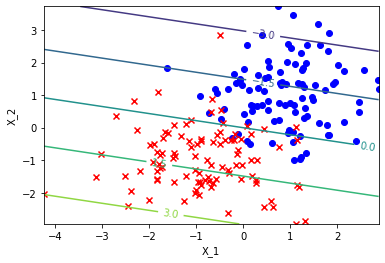

In [47]:
# Test sur des données jouets
adaline = ClassifierADALINE(2, 1e-2, history=True) 
# Rappel: une fois dans Classifier.py, pensez à préfixer par cl.

# n'hésitez pas à jouer sur les paramètres
# vous pouvez supprimer temporairement l'argument history s'il n'est pas implémenté dans votre version.
# il faudra cependant l'ajouter avant de passer à la boite suivante

tic= time.time()
adaline.train(X, Y)
toc= time.time()

print('Perf A:', adaline.accuracy(X, Y))

print(f"Résultat en {(toc-tic):.4} secondes")

# Fonction du TME 4 nécessaire pour l'exécution suivante:
def k_id(x): # fonction identité (juste pour être compatible avec les kernels ensuite)
    return x

ut.plot_frontiere_V3(X,Y, adaline.w, k_id, step=30, forme=1, fname=None)

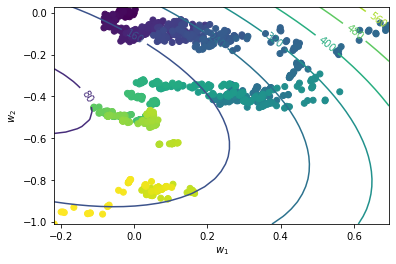

In [48]:
# Visualisation de la descente de gradient

allw = np.array(adaline.allw)

# construction d'une grille de 'toutes' les valeurs possibles de w
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# evaluation du cout pour toutes ces solutions potentielles
res = np.array([np.sum([max(0, ((w @ X[i]) - Y[i]) ** 2) for i in range(len(Y))]) for w in grid])
res = res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw[:,0], allw[:,1], c=np.arange(len(allw)))

#plt.savefig("out/espace_param_MC.png")

## ADALINE analytique

<div class="alert alert-block alert-info">

Contrairement au perceptron, il est possible de calculer une solution analytique pour ADALINE. En effet, on peut montrer que l'annulation du gradient correspond au problème suivant:

$$ \underbrace{X^T X}_{\in \mathbb R^{d \times d}} \ \underbrace{\mathbf w}_{\in \mathbb R^{d}} = \underbrace{X^T Y}_{\in \mathbb R^{d}}$$

La fonction ```np.linalg.solve``` permet justement de résoudre un tel système d'équations linéaires.

1. Utiliser la documentation pour appliquer ```np.linalg.solve``` sur le problème qui nous intéresse et vérifier que la solution est bien intéressante.
1. Ecrire la classe `ClassifierADALINE2` qui implémente le classifieur ADALINE utilisant cette approche pour calculer la solution analytique.
1. Une fois fonctionnel, intégrer ce code dans le fichier ```Classifiers.py```
    
**Note:** cet algorithme n'est plus itératif, il n'y a plus de ```learning_rate``` ni d'itération max ou d'historique...
    
</div>

In [34]:
class ClassifierADALINE2(classif.Classifier):
    """ Perceptron de ADALINE Analytique
    """
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        classif.Classifier.__init__(self, input_dimension)
        self.w = np.zeros(input_dimension)
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            réalise une itération sur l'ensemble des données prises aléatoirement
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        X = desc_set
        Y = label_set
        self.w = np.linalg.solve(X.T @ X, X.T @ Y)
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(self.w, x)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return -1 if self.score(x) <= 0 else +1

Résultat en 0.0003717 secondes


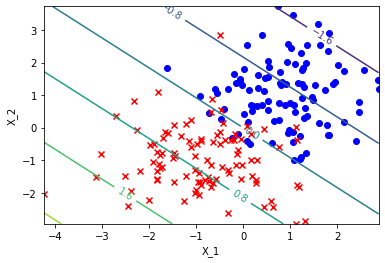

In [35]:
# reTest sur des données jouets
adaline2 = ClassifierADALINE2(2) 

# n'hésitez pas à jouer sur les paramètres
# vous pouvez supprimer temporairement l'argument history s'il n'est pas implémenté dans votre version.
# il faudra cependant l'ajouter avant de passer à la boite suivante

tic= time.time()
adaline2.train(X, Y)
toc= time.time()

print(f"Résultat en {(toc-tic):.4} secondes")
ut.plot_frontiere_V3(X,Y, adaline2.w, k_id, step=30, forme=1, fname=None)

# Comparer le résultat avec celui obtenu avec adaline.

## Expérimentations 


<font color="RED" size="+1"><b>[Q]</b></font> Proposer un ensemble d'expérimentations sur les données USPS (en choisissant 2 classes pour en faire un problème de classification binaire) afin de comparer les 3 classifiers `ClassifierPerceptron`, `ClassifierPerceptronBiais` et `ClassifierAdaline`.

Remarque: une bonne comparaison étudie différents aspects: accuracy train/test, variance de l'accuracy, mais aussi vitesse de convergence de l'algorithme.